In [37]:
import requests

In [5]:
pip install lxml

     |████████████████████████████████| 4.5 MB 6.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install fake_useragent

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=1a60cc5da5d1caaab33055ab1ff30e1bf924cd9d2d775d6023811d1616832779
  Stored in directory: /Users/kawanwong/Library/Caches/pip/wheels/a0/b8/b7/8c942b2c5be5158b874a88195116b05ad124bac795f6665e65
Successfully built fake-useragent
Note: you may need to restart the kernel to use updated packages.


In [38]:
import csv
import requests
from lxml import etree
import random
from fake_useragent import UserAgent

In [ ]:
#https://movie.douban.com/subject/34812928/reviews?start=0

In [39]:
# 伪装头
headers = {
    'User-Agent': UserAgent().random,
    'Host': 'movie.douban.com',
    'Connection': 'keep-alive'
}
# 遍历用的url模板
base_url = 'https://movie.douban.com/subject/34812928/reviews?start={}'
# 代理池
proxy_pool = [{'http': 'http://123.169.118.8:9999'}, {'http': 'http://175.43.154.137:9999'}, {'http': 'http://117.91.165.126:9999'}, {'http': 'http://113.124.86.125:9999'}]

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "/Users/kawanwong/opt/anaconda3/lib/python3.8/site-packages/fake_useragent/utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "/Users/kawanwong/opt/anaconda3/lib/python3.8/site-packages/fake_useragent/utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


In [40]:
def get_detail(url):
	# 网页请求
    response = requests.get(url=url, headers=headers, proxies=random.choice(proxy_pool)).text
    response_data = etree.HTML(response)
    # etree解析网页 获得评论的div列表
    div_list = response_data.xpath('//div[@class="review-list  "]/div')
    for div in div_list:
        # 获取对应的数据 评论人 评价 评论时间 评论标题 评论主体 赞成数 反对数 回复数
        name = div.xpath('./div/header/a[@class="name"]/text()')[0]
        level = div.xpath('./div/header/span[1]/@title')
        # 有的评价为空 list列表取[0]会报错
        if len(level):
            level = level[0]
        else:
            level = '暂无评价'
        time = div.xpath('./div/header/span[@class="main-meta"]/text()')[0]
        title = div.xpath('./div/div/h2/a/text()')[0]
        content = "".join(div.xpath('./div/div/div[1]/div[@class="short-content"]/text()')).replace("\n",
                                                            "").replace(" ", "").split("...")[0]
        up = div.xpath('./div/div/div[@class="action"]/a[1]/span/text()')[0].replace("\n", "").replace(" ", "")
        down = div.xpath('./div/div/div[@class="action"]/a[2]/span/text()')[0].replace("\n", "").replace(" ", "")
        reply = div.xpath('./div/div/div[@class="action"]/a[3]/text()')[0]
        detail = [name, level, time, title, content, up, down, reply]
        # 返回对应的一条数据
        yield detail


In [41]:
if __name__ == '__main__':
    # 打开表格文件 注意编码格式
    file = open('fish.csv', 'w', newline='', encoding='utf-8-sig')
    writer = csv.writer(file)
    # 写表格的头部
    writer.writerow(['comment_er', 'level', 'comment_time', 'caption', 'content', 'support', 'object', 'feedback'])
    # 循环遍历 爬取所有评论
    for i in range(0, 1201, 20):
        print('正在爬取start={}的数据'.format(i))
        # 获得返回的数据
        res = get_detail(base_url.format(i))
        # 数据写入
        writer.writerows(res)


正在爬取start=0的数据
正在爬取start=20的数据
正在爬取start=40的数据
正在爬取start=60的数据
正在爬取start=80的数据
正在爬取start=100的数据
正在爬取start=120的数据
正在爬取start=140的数据
正在爬取start=160的数据
正在爬取start=180的数据
正在爬取start=200的数据
正在爬取start=220的数据
正在爬取start=240的数据
正在爬取start=260的数据
正在爬取start=280的数据
正在爬取start=300的数据
正在爬取start=320的数据
正在爬取start=340的数据
正在爬取start=360的数据
正在爬取start=380的数据
正在爬取start=400的数据
正在爬取start=420的数据
正在爬取start=440的数据
正在爬取start=460的数据
正在爬取start=480的数据
正在爬取start=500的数据
正在爬取start=520的数据
正在爬取start=540的数据
正在爬取start=560的数据
正在爬取start=580的数据
正在爬取start=600的数据
正在爬取start=620的数据
正在爬取start=640的数据
正在爬取start=660的数据
正在爬取start=680的数据
正在爬取start=700的数据
正在爬取start=720的数据
正在爬取start=740的数据
正在爬取start=760的数据
正在爬取start=780的数据
正在爬取start=800的数据
正在爬取start=820的数据
正在爬取start=840的数据
正在爬取start=860的数据
正在爬取start=880的数据
正在爬取start=900的数据
正在爬取start=920的数据
正在爬取start=940的数据
正在爬取start=960的数据
正在爬取start=980的数据
正在爬取start=1000的数据
正在爬取start=1020的数据
正在爬取start=1040的数据
正在爬取start=1060的数据
正在爬取start=1080的数据
正在爬取start=1100的数据
正在爬取start=1120的数据
正在爬取start=1140的数据
正在爬取start=11

In [42]:
import pandas as pd 
import numpy as np

In [149]:
csv_file = "fish.csv"
gapminder = pd.read_csv(csv_file)

In [150]:
print(type(gapminder))
gapminder

<class 'pandas.core.frame.DataFrame'>


,comment_er,level,comment_time,caption,content,support,object,feedback
0,霧風誌MONA,力荐,2021-09-19 15:40:14,《鱿鱼游戏》的空间与符号隐喻分析，人性外“浓缩”的社会规则,（首发于公众号：霧風誌，欢迎关注！）巧用“反差”形成张力，空间隐喻造“楚门的世界”相比较其他...,2568.0,122.0,483回应
1,巴斯特德,力荐,2021-09-20 14:27:58,我讨厌那些理智的评论,这个电视剧里设计的游戏就是你我身处真实世界的一个形态变化。每一次，大家都在强调，人不是数字，...,1168.0,153.0,256回应
2,柒,还行,2021-09-19 19:41:11,我赌马打架不工作啃老但我知道我是个好爸爸好儿子,圣父，是众生之父。这部片子我原本是带着“哇！网飞+韩国这种组合，这演人性不是底线击飞！期待期...,1015.0,123.0,553回应
3,虞衾,暂无评价,2021-09-19 23:42:05,男主不是圣父，而是伪善，坏而不自知！！,看完我最大的疑问就是这样的人怎么能当男主?如果这部剧男主的突出点在于最后所谓的“相信人”，通...,737.0,133.0,616回应
4,Fridy777,暂无评价,2021-09-24 13:02:41,发现,为了公平起见，我们不能事先公布游戏内容”——□这是□（管理员）的一句话。可现实是：第一个游戏...,236.0,1.0,42回应
...,...,...,...,...,...,...,...,...
1203,Grace_Sun,还行,2021-09-21 00:56:50,讨厌男主的人设,全剧最讨厌男主。进入游戏之前是个游手好闲的无业游民，既不过问女儿的生活，也不顾年迈的老母亲的...,3.0,NaN,1回应
1204,helloworld,还行,2021-09-21 00:46:44,男主人设和烂尾毁了这部剧好吧,最大的败笔就是男主人设最大的亮点一是第二集的超半数人同意中途放弃游戏但人间才是地狱所以想活而...,5.0,NaN,2回应
1205,巫岚,力荐,2021-09-21 00:36:14,只想看游戏部分的人，这剧不适合你,好多年没彻夜追剧了，韩国拍现实隐喻类题材真是牛啊。几个主要角色的背景交代，非游戏线的穿插都很...,10.0,NaN,0回应
1206,关关biu,暂无评价,2021-09-21 00:14:12,人性的恶,暴力血腥犯罪性动物本性这些都是人性中恶的体现，这部剧就是在帮助我们找到人性中的恶，看到这恶带...,NaN,NaN,0回应


In [151]:
desc = gapminder["support"].describe() 
  
# display 
desc

count     505.000000
mean       16.958416
std       139.152167
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      2568.000000
Name: support, dtype: float64

In [152]:
gapminder

,comment_er,level,comment_time,caption,content,support,object,feedback
0,霧風誌MONA,力荐,2021-09-19 15:40:14,《鱿鱼游戏》的空间与符号隐喻分析，人性外“浓缩”的社会规则,（首发于公众号：霧風誌，欢迎关注！）巧用“反差”形成张力，空间隐喻造“楚门的世界”相比较其他...,2568.0,122.0,483回应
1,巴斯特德,力荐,2021-09-20 14:27:58,我讨厌那些理智的评论,这个电视剧里设计的游戏就是你我身处真实世界的一个形态变化。每一次，大家都在强调，人不是数字，...,1168.0,153.0,256回应
2,柒,还行,2021-09-19 19:41:11,我赌马打架不工作啃老但我知道我是个好爸爸好儿子,圣父，是众生之父。这部片子我原本是带着“哇！网飞+韩国这种组合，这演人性不是底线击飞！期待期...,1015.0,123.0,553回应
3,虞衾,暂无评价,2021-09-19 23:42:05,男主不是圣父，而是伪善，坏而不自知！！,看完我最大的疑问就是这样的人怎么能当男主?如果这部剧男主的突出点在于最后所谓的“相信人”，通...,737.0,133.0,616回应
4,Fridy777,暂无评价,2021-09-24 13:02:41,发现,为了公平起见，我们不能事先公布游戏内容”——□这是□（管理员）的一句话。可现实是：第一个游戏...,236.0,1.0,42回应
...,...,...,...,...,...,...,...,...
1203,Grace_Sun,还行,2021-09-21 00:56:50,讨厌男主的人设,全剧最讨厌男主。进入游戏之前是个游手好闲的无业游民，既不过问女儿的生活，也不顾年迈的老母亲的...,3.0,NaN,1回应
1204,helloworld,还行,2021-09-21 00:46:44,男主人设和烂尾毁了这部剧好吧,最大的败笔就是男主人设最大的亮点一是第二集的超半数人同意中途放弃游戏但人间才是地狱所以想活而...,5.0,NaN,2回应
1205,巫岚,力荐,2021-09-21 00:36:14,只想看游戏部分的人，这剧不适合你,好多年没彻夜追剧了，韩国拍现实隐喻类题材真是牛啊。几个主要角色的背景交代，非游戏线的穿插都很...,10.0,NaN,0回应
1206,关关biu,暂无评价,2021-09-21 00:14:12,人性的恶,暴力血腥犯罪性动物本性这些都是人性中恶的体现，这部剧就是在帮助我们找到人性中的恶，看到这恶带...,NaN,NaN,0回应


<AxesSubplot:title={'center':'赞反比'}, xlabel='support', ylabel='object'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/kawanwong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36190 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kawanwong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kawanwong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kawanwong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 36190 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/kawanwong/opt/anaconda3/lib/python3.8/site-packa

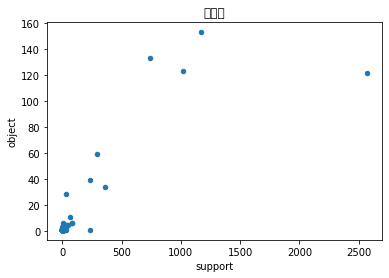

In [153]:
gapminder.plot(kind='scatter',
                    x='support',
                    y='object',
                    title='赞反比')

In [154]:
gapminder['caption'] = gapminder['caption'].str.replace('[^\w\s]', '')
gapminder['caption'].head()

/var/folders/_y/lzqhs5394mz4mb9gx_dgt6vw0000gn/T/ipykernel_31097/1498701477.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gapminder['caption'] = gapminder['caption'].str.replace('[^\w\s]', '')


0    鱿鱼游戏的空间与符号隐喻分析人性外浓缩的社会规则
1                  我讨厌那些理智的评论
2     我赌马打架不工作啃老但我知道我是个好爸爸好儿子
3             男主不是圣父而是伪善坏而不自知
4                          发现
Name: caption, dtype: object

In [155]:
#open stopwords list
st = open('cn_stopwords.txt',encoding='utf-8')

stopwords = [i.strip() for i in st.readlines()]

In [156]:
gapminder['caption'] = gapminder['caption'].apply(
    lambda ttl: " ".join(wrd for wrd in ttl.split() if wrd not in stopwords))
gapminder['caption'].head()

0    鱿鱼游戏的空间与符号隐喻分析人性外浓缩的社会规则
1                  我讨厌那些理智的评论
2     我赌马打架不工作啃老但我知道我是个好爸爸好儿子
3             男主不是圣父而是伪善坏而不自知
4                          发现
Name: caption, dtype: object

In [157]:
gapminder['contnet'] = gapminder['content'].str.replace('[^\w\s]', '')
gapminder['content'].head()

/var/folders/_y/lzqhs5394mz4mb9gx_dgt6vw0000gn/T/ipykernel_31097/3572198897.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gapminder['contnet'] = gapminder['content'].str.replace('[^\w\s]', '')


0    （首发于公众号：霧風誌，欢迎关注！）巧用“反差”形成张力，空间隐喻造“楚门的世界”相比较其他...
1    这个电视剧里设计的游戏就是你我身处真实世界的一个形态变化。每一次，大家都在强调，人不是数字，...
2    圣父，是众生之父。这部片子我原本是带着“哇！网飞+韩国这种组合，这演人性不是底线击飞！期待期...
3    看完我最大的疑问就是这样的人怎么能当男主?如果这部剧男主的突出点在于最后所谓的“相信人”，通...
4    为了公平起见，我们不能事先公布游戏内容”——□这是□（管理员）的一句话。可现实是：第一个游戏...
Name: content, dtype: object

In [158]:
import re
import jieba

In [159]:
#open stopwords list
st = open('cn_stopwords.txt',encoding='utf-8')

stopwords = [i.strip() for i in st.readlines()]

In [164]:
def pretty_cut(sentence):
    cut_list = jieba.cut(''.join(re.findall('[\u4e00-\u9fa5]', sentence)), cut_all = False)
    for i in range(len(cut_list)-1, -1, -1):
        if cut_list in stopwords:
            del cut_list
    return cut_list


In [165]:
list(map(lambda x: pretty_cut(x), gapminder['caption']))

TypeError: 'list' object is not callable

In [130]:
gapminder['ti_seg'] = list

In [163]:
gapminder

,comment_er,level,comment_time,caption,content,support,object,feedback,contnet
0,霧風誌MONA,力荐,2021-09-19 15:40:14,鱿鱼游戏的空间与符号隐喻分析人性外浓缩的社会规则,（首发于公众号：霧風誌，欢迎关注！）巧用“反差”形成张力，空间隐喻造“楚门的世界”相比较其他...,2568.0,122.0,483回应,首发于公众号霧風誌欢迎关注巧用反差形成张力空间隐喻造楚门的世界相比较其他杀人游戏题材的作品鱿...
1,巴斯特德,力荐,2021-09-20 14:27:58,我讨厌那些理智的评论,这个电视剧里设计的游戏就是你我身处真实世界的一个形态变化。每一次，大家都在强调，人不是数字，...,1168.0,153.0,256回应,这个电视剧里设计的游戏就是你我身处真实世界的一个形态变化每一次大家都在强调人不是数字人不是符...
2,柒,还行,2021-09-19 19:41:11,我赌马打架不工作啃老但我知道我是个好爸爸好儿子,圣父，是众生之父。这部片子我原本是带着“哇！网飞+韩国这种组合，这演人性不是底线击飞！期待期...,1015.0,123.0,553回应,圣父是众生之父这部片子我原本是带着哇网飞韩国这种组合这演人性不是底线击飞期待期待谁知道看完有...
3,虞衾,暂无评价,2021-09-19 23:42:05,男主不是圣父而是伪善坏而不自知,看完我最大的疑问就是这样的人怎么能当男主?如果这部剧男主的突出点在于最后所谓的“相信人”，通...,737.0,133.0,616回应,看完我最大的疑问就是这样的人怎么能当男主如果这部剧男主的突出点在于最后所谓的相信人通观九集根...
4,Fridy777,暂无评价,2021-09-24 13:02:41,发现,为了公平起见，我们不能事先公布游戏内容”——□这是□（管理员）的一句话。可现实是：第一个游戏...,236.0,1.0,42回应,为了公平起见我们不能事先公布游戏内容这是管理员的一句话可现实是第一个游戏一二三木头人这个一二...
...,...,...,...,...,...,...,...,...,...
1203,Grace_Sun,还行,2021-09-21 00:56:50,讨厌男主的人设,全剧最讨厌男主。进入游戏之前是个游手好闲的无业游民，既不过问女儿的生活，也不顾年迈的老母亲的...,3.0,NaN,1回应,全剧最讨厌男主进入游戏之前是个游手好闲的无业游民既不过问女儿的生活也不顾年迈的老母亲的身体让...
1204,helloworld,还行,2021-09-21 00:46:44,男主人设和烂尾毁了这部剧好吧,最大的败笔就是男主人设最大的亮点一是第二集的超半数人同意中途放弃游戏但人间才是地狱所以想活而...,5.0,NaN,2回应,最大的败笔就是男主人设最大的亮点一是第二集的超半数人同意中途放弃游戏但人间才是地狱所以想活而...
1205,巫岚,力荐,2021-09-21 00:36:14,只想看游戏部分的人这剧不适合你,好多年没彻夜追剧了，韩国拍现实隐喻类题材真是牛啊。几个主要角色的背景交代，非游戏线的穿插都很...,10.0,NaN,0回应,好多年没彻夜追剧了韩国拍现实隐喻类题材真是牛啊几个主要角色的背景交代非游戏线的穿插都很不错铺...
1206,关关biu,暂无评价,2021-09-21 00:14:12,人性的恶,暴力血腥犯罪性动物本性这些都是人性中恶的体现，这部剧就是在帮助我们找到人性中的恶，看到这恶带...,NaN,NaN,0回应,暴力血腥犯罪性动物本性这些都是人性中恶的体现这部剧就是在帮助我们找到人性中的恶看到这恶带来的...


In [131]:
gapminder['seg']

0       [鱿鱼, 游戏, 空间, 符号, 隐喻, 分析, 人性, 外, 浓缩, 社会, 规则]
1                                      [讨厌, 理智, 评论]
2                    [赌马, 打架, 工作, 啃, 老, 知道, 爸爸, 儿子]
3                               [男主, 圣父, 伪善, 坏, 自知]
4                                              [发现]
                           ...                     
1203                                   [讨厌, 男主, 人设]
1204                        [男主人, 设, 烂尾, 毁, 这部, 剧好]
1205                           [只想, 游戏, 部分, 这剧, 适合]
1206                                        [人性, 恶]
1207                  [剧透慎点, 仅, 送给, 着急, 知道, 结局, 朋友]
Name: seg, Length: 1208, dtype: object

In [110]:
gapminder['out'] = 1

In [113]:
inputs =  gapminder['caption'] 
outputs = gapminder['out']   
for line in inputs:  
    line_seg = seg_sentence(line)  # 這裏的返回值是字符串  
    outputs = (line_seg + '\n') 
outputs  
inputs

0       鱿鱼游戏的空间与符号隐喻分析人性外浓缩的社会规则
1                     我讨厌那些理智的评论
2        我赌马打架不工作啃老但我知道我是个好爸爸好儿子
3                男主不是圣父而是伪善坏而不自知
4                             发现
                  ...           
1203                     讨厌男主的人设
1204              男主人设和烂尾毁了这部剧好吧
1205             只想看游戏部分的人这剧不适合你
1206                        人性的恶
1207           剧透慎点仅送给着急知道结局的朋友们
Name: caption, Length: 1208, dtype: object

In [114]:
gapminder

,comment_er,level,comment_time,caption,content,support,object,feedback,emotion,contnet,out
0,霧風誌MONA,力荐,2021-09-19 15:40:14,鱿鱼游戏的空间与符号隐喻分析人性外浓缩的社会规则,（首发于公众号：霧風誌，欢迎关注！）巧用“反差”形成张力，空间隐喻造“楚门的世界”相比较其他...,2568.0,122.0,483回应,0.999996,首发于公众号霧風誌欢迎关注巧用反差形成张力空间隐喻造楚门的世界相比较其他杀人游戏题材的作品鱿...,1
1,巴斯特德,力荐,2021-09-20 14:27:58,我讨厌那些理智的评论,这个电视剧里设计的游戏就是你我身处真实世界的一个形态变化。每一次，大家都在强调，人不是数字，...,1168.0,153.0,256回应,1.000000,这个电视剧里设计的游戏就是你我身处真实世界的一个形态变化每一次大家都在强调人不是数字人不是符...,1
2,柒,还行,2021-09-19 19:41:11,我赌马打架不工作啃老但我知道我是个好爸爸好儿子,圣父，是众生之父。这部片子我原本是带着“哇！网飞+韩国这种组合，这演人性不是底线击飞！期待期...,1015.0,123.0,553回应,0.999999,圣父是众生之父这部片子我原本是带着哇网飞韩国这种组合这演人性不是底线击飞期待期待谁知道看完有...,1
3,虞衾,暂无评价,2021-09-19 23:42:05,男主不是圣父而是伪善坏而不自知,看完我最大的疑问就是这样的人怎么能当男主?如果这部剧男主的突出点在于最后所谓的“相信人”，通...,737.0,133.0,616回应,1.000000,看完我最大的疑问就是这样的人怎么能当男主如果这部剧男主的突出点在于最后所谓的相信人通观九集根...,1
4,Fridy777,暂无评价,2021-09-24 13:02:41,发现,为了公平起见，我们不能事先公布游戏内容”——□这是□（管理员）的一句话。可现实是：第一个游戏...,236.0,1.0,42回应,0.863763,为了公平起见我们不能事先公布游戏内容这是管理员的一句话可现实是第一个游戏一二三木头人这个一二...,1
...,...,...,...,...,...,...,...,...,...,...,...
1203,Grace_Sun,还行,2021-09-21 00:56:50,讨厌男主的人设,全剧最讨厌男主。进入游戏之前是个游手好闲的无业游民，既不过问女儿的生活，也不顾年迈的老母亲的...,3.0,NaN,1回应,0.998425,全剧最讨厌男主进入游戏之前是个游手好闲的无业游民既不过问女儿的生活也不顾年迈的老母亲的身体让...,1
1204,helloworld,还行,2021-09-21 00:46:44,男主人设和烂尾毁了这部剧好吧,最大的败笔就是男主人设最大的亮点一是第二集的超半数人同意中途放弃游戏但人间才是地狱所以想活而...,5.0,NaN,2回应,0.226104,最大的败笔就是男主人设最大的亮点一是第二集的超半数人同意中途放弃游戏但人间才是地狱所以想活而...,1
1205,巫岚,力荐,2021-09-21 00:36:14,只想看游戏部分的人这剧不适合你,好多年没彻夜追剧了，韩国拍现实隐喻类题材真是牛啊。几个主要角色的背景交代，非游戏线的穿插都很...,10.0,NaN,0回应,0.954580,好多年没彻夜追剧了韩国拍现实隐喻类题材真是牛啊几个主要角色的背景交代非游戏线的穿插都很不错铺...,1
1206,关关biu,暂无评价,2021-09-21 00:14:12,人性的恶,暴力血腥犯罪性动物本性这些都是人性中恶的体现，这部剧就是在帮助我们找到人性中的恶，看到这恶带...,NaN,NaN,0回应,1.000000,暴力血腥犯罪性动物本性这些都是人性中恶的体现这部剧就是在帮助我们找到人性中的恶看到这恶带来的...,1


In [ ]:
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

In [51]:
pip install SnowNLP

     |████████████████████████████████| 37.6 MB 7.9 MB/s eta 0:00:01
  Created wheel for SnowNLP: filename=snownlp-0.12.3-py3-none-any.whl size=37760963 sha256=e621f7277d0d4e0ba4cb313054e59393ab0c9bb8e1e850d4adbf8df08f216d5e
  Stored in directory: /Users/kawanwong/Library/Caches/pip/wheels/09/14/c5/ea9aee34229caa97c6f6ff78c82c7f2b1a3423c1f37227b6a6
Successfully built SnowNLP
Note: you may need to restart the kernel to use updated packages.


In [52]:
from snownlp import SnowNLP


In [166]:
gapminder['emotion'] = gapminder['content'].apply(lambda x:SnowNLP(x).sentiments)
gapminder.head(10)

,comment_er,level,comment_time,caption,content,support,object,feedback,contnet,emotion
0,霧風誌MONA,力荐,2021-09-19 15:40:14,鱿鱼游戏的空间与符号隐喻分析人性外浓缩的社会规则,（首发于公众号：霧風誌，欢迎关注！）巧用“反差”形成张力，空间隐喻造“楚门的世界”相比较其他...,2568.0,122.0,483回应,首发于公众号霧風誌欢迎关注巧用反差形成张力空间隐喻造楚门的世界相比较其他杀人游戏题材的作品鱿...,0.999996
1,巴斯特德,力荐,2021-09-20 14:27:58,我讨厌那些理智的评论,这个电视剧里设计的游戏就是你我身处真实世界的一个形态变化。每一次，大家都在强调，人不是数字，...,1168.0,153.0,256回应,这个电视剧里设计的游戏就是你我身处真实世界的一个形态变化每一次大家都在强调人不是数字人不是符...,1.000000
2,柒,还行,2021-09-19 19:41:11,我赌马打架不工作啃老但我知道我是个好爸爸好儿子,圣父，是众生之父。这部片子我原本是带着“哇！网飞+韩国这种组合，这演人性不是底线击飞！期待期...,1015.0,123.0,553回应,圣父是众生之父这部片子我原本是带着哇网飞韩国这种组合这演人性不是底线击飞期待期待谁知道看完有...,0.999999
3,虞衾,暂无评价,2021-09-19 23:42:05,男主不是圣父而是伪善坏而不自知,看完我最大的疑问就是这样的人怎么能当男主?如果这部剧男主的突出点在于最后所谓的“相信人”，通...,737.0,133.0,616回应,看完我最大的疑问就是这样的人怎么能当男主如果这部剧男主的突出点在于最后所谓的相信人通观九集根...,1.000000
4,Fridy777,暂无评价,2021-09-24 13:02:41,发现,为了公平起见，我们不能事先公布游戏内容”——□这是□（管理员）的一句话。可现实是：第一个游戏...,236.0,1.0,42回应,为了公平起见我们不能事先公布游戏内容这是管理员的一句话可现实是第一个游戏一二三木头人这个一二...,0.863763
5,沈 念,还行,2021-09-23 13:47:50,孔刘狂扇李政宰耳光的结果是扇不醒,我照例是先讲一下剧情以及我从这部剧里看到的风景。帅气的李政宰欧巴在本剧是一个彻头彻尾的los...,360.0,34.0,70回应,我照例是先讲一下剧情以及我从这部剧里看到的风景帅气的李政宰欧巴在本剧是一个彻头彻尾的lose...,0.999995
6,dodo,推荐,2021-09-23 01:53:35,前8集有多精彩第9集就有多拉胯,整个剧看起来还是非常爽的，说几个不完美的地方1.获胜者之一的哥哥，把肾都可以给弟弟，在紧要关...,291.0,59.0,258回应,整个剧看起来还是非常爽的说几个不完美的地方1获胜者之一的哥哥把肾都可以给弟弟在紧要关头尽然可...,0.999990
7,哒哒娃,还行,2021-09-22 23:03:40,什么都想搭上一点结果化了一个底气不足的妆,最近都在讨论这个，但似乎过誉了吧，4星5星毫不手软地往外甩，这是剧荒成什么样啊？怎么我全程看...,231.0,39.0,61回应,最近都在讨论这个但似乎过誉了吧4星5星毫不手软地往外甩这是剧荒成什么样啊怎么我全程看得心无波...,0.999972
8,新京报书评周刊,暂无评价,2021-10-11 11:45:51,鱿鱼游戏普通人与恶的距离究竟有多远,最近，韩剧《鱿鱼游戏》成了爆款。为何这部剧会爆火呢？它虚构了一个封闭环境中的比赛系统，乍看是...,62.0,NaN,3回应,最近韩剧鱿鱼游戏成了爆款为何这部剧会爆火呢它虚构了一个封闭环境中的比赛系统乍看是对一二三木头...,0.999993
9,石墨,推荐,2021-10-05 16:18:13,关于鱿鱼游戏抄袭的几句话,0.不是为了黑这部大热剧，也不是看不起韩剧，只是实事求是。1.《鱿鱼游戏》这种“被邀请去玩游...,62.0,11.0,34回应,0不是为了黑这部大热剧也不是看不起韩剧只是实事求是1鱿鱼游戏这种被邀请去玩游戏输了就死赢了得...,0.999965


In [54]:
gapminder['emotion'] .describe()

count    1208.000000
mean        0.905202
std         0.258744
min         0.000000
25%         0.998458
50%         0.999996
75%         1.000000
max         1.000000
Name: emotion, dtype: float64

In [55]:
# Calculate the number for positive titles and negative titles
pos = 0
neg = 0
for i in gapminder['emotion']:
    if i >= 0.5:
        pos += 1
    else:
        neg += 1
print('The number for titles and negative titles is：')
pos,neg

The number for positive songs and negative songs is：


(1096, 112)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


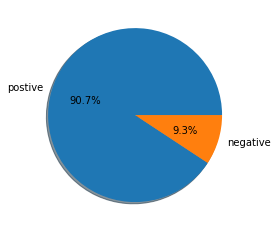

In [56]:
# The percentage for postive songs and negative title
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pie_labels='postive','negative'
plt.pie([pos,neg],labels=pie_labels,autopct='%1.1f%%',shadow=True)

plt.show()